## Scene Classification - CNN

Görüntü sınıflandırma, bilgisayarla görü alanında önemli bir araştırma konusudur ve doğal sahnelerin otomatik olarak tanımlanması, bu alanın temel uygulamalarından biridir. Bu görev, çeşitli endüstrilerde, özellikle de otonom araçlar, doğal kaynak yönetimi ve turizm uygulamalarında kritik bir rol oynamaktadır.

Bu çalışma, doğal sahne görüntülerinin sınıflandırılması için bir CNN modelinin geliştirilmesini içermektedir. Veri seti, her biri farklı özelliklere sahip olan altı sahne kategorisi içermektedirYaklaşık 25.000 resimden oluşmaktadır.

* Binalar: İnsan yapımı yapıların bulunduğu görüntüler.
* Ormanlar: Ağaç ve bitki örtüsü ile dolu doğal alanlar.
* Dağlar: Yüksek ve dik araziler.
* Buzullar: Buzla kaplı alanlar, genellikle soğuk iklimlerde bulunur.
* Sokaklar: Şehir veya kasaba içindeki yollar ve yolların çevresi.
* Deniz: Su kütlelerinin bulunduğu sahneler.

Bu çalışma, verimlilik ve doğruluk açısından CNN mimarisinin nasıl optimize edileceğini, veri ön işleme adımlarını ve modelin eğitim sürecini incelemeyi amaçlamaktadır. Sonuç olarak, modelin performansını değerlendirmek için çeşitli metrikler kullanılacak ve sahne sınıflandırma görevindeki başarısı analiz edilecektir. Bu yaklaşım, derin öğrenme tekniklerinin doğal sahne sınıflandırma alanındaki potansiyelini göstermeyi amaçlamaktadır.

<img src='scene1.jpg' width=550 >

<a href='https://www.kaggle.com/datasets/nitishabharathi/scene-classification' target=_blank>Data dosyasını burada bulabilirsiniz.</a>

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Kütüphaneleri Yükleme

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import os
import cv2
import shutil
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/kaggle/input/scene-classification/train-scene classification/train.csv')
#Dosyayı okuyoruz.

In [ ]:
df.head()

#Resimler kendisi dosyada var.Kendi sınıfları da var.Bu yüzden label encoding yapmayacağız.

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


In [ ]:
df.shape

(17034, 2)

In [ ]:
df.columns=['img','label']
#Sütunları tekrar isimlendiriyoruz.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17034 entries, 0 to 17033
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img     17034 non-null  object
 1   label   17034 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 266.3+ KB


In [ ]:
# Dosya yolu
base_path = '/kaggle/input/scene-classification/train-scene classification/train/'

# Mevcut DataFrame'deki image_name sütununu kullanarak tam dosya yollarını oluşturma
df['img'] = base_path + df['img']

#Verilen csv dosyasında resimlerin dosya yolu yok.Resimleri okuyup,normalize ederken dosya yolunu bulamıyor.
#Bizde bu yüzden dosya yolunu kendimiz ekliyoruz.

In [ ]:
x=[]
for img in df['img']:
    img=cv2.imread(img)
    img=cv2.resize(img,(64,64))
    img=img/255.0
    x.append(img)

## Modelleme 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import save_model
from tensorflow.keras.preprocessing import image
from keras.utils import to_categorical

In [ ]:
x=np.array(x)

In [ ]:
y=df['label']

In [ ]:
df['label'].nunique()

6

In [ ]:
print(len(x))
print(len(y))

17034
17034


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [ ]:
y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

# Eğitim ve test etiketlerini one-hot encoding ile dönüştürüyoruz.Yoksa hata veriyor.

In [ ]:
model=Sequential()
model.add(Input(shape=(64,64,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))
early_stopping=EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=25,verbose=1,validation_data=(x_test,y_test),callbacks=[early_stopping])

Epoch 1/25
426/426 ━━━━━━━━━━━━━━━━━━━━ 40s 89ms/step - accuracy: 0.5470 - loss: 1.1985 - val_accuracy: 0.7162 - val_loss: 0.7782
Epoch 2/25
426/426 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step - accuracy: 0.7366 - loss: 0.7346 - val_accuracy: 0.7693 - val_loss: 0.6644
Epoch 3/25
426/426 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.7953 - loss: 0.5868 - val_accuracy: 0.7878 - val_loss: 0.5955
Epoch 4/25
426/426 ━━━━━━━━━━━━━━━━━━━━ 38s 88ms/step - accuracy: 0.8397 - loss: 0.4634 - val_accuracy: 0.7904 - val_loss: 0.5938
Epoch 5/25
426/426 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step - accuracy: 0.8724 - loss: 0.3610 - val_accuracy: 0.7810 - val_loss: 0.6840
Epoch 6/25
426/426 ━━━━━━━━━━━━━━━━━━━━ 38s 88ms/step - accuracy: 0.8934 - loss: 0.2991 - val_accuracy: 0.7631 - val_loss: 0.7750
Epoch 7/25
426/426 ━━━━━━━━━━━━━━━━━━━━ 38s 88ms/step - accuracy: 0.9137 - loss: 0.2416 - val_accuracy: 0.7825 - val_loss: 0.7739
Epoch 8/25
426/426 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step - accuracy: 0.9440 - loss: 0.1730 - 

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,877,780 (18.61 MB)

 Trainable params: 1,625,926 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,251,854 (12.40 MB)

In [ ]:
loss,accuracy=model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7492 - loss: 1.3671
Test Loss: 1.3592864274978638
Test Accuracy: 0.7549163699150085


In [ ]:
pred=model.predict(x_test)

107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


In [ ]:
y_test = np.argmax(y_test, axis=1)
pred = np.argmax(pred, axis=1)

In [ ]:
confusion_matrix(y_test,pred)

array([[370,  16,  17,  21,  44,  80],
       [  9, 523,   0,   6,   3,   9],
       [ 17,   4, 396,  95,  70,  17],
       [ 13,   2,  68, 413,  90,   8],
       [ 20,   5,  31,  36, 443,  19],
       [ 79,  26,   8,   7,  15, 427]])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       548
           1       0.91      0.95      0.93       550
           2       0.76      0.66      0.71       599
           3       0.71      0.70      0.70       594
           4       0.67      0.80      0.73       554
           5       0.76      0.76      0.76       562

    accuracy                           0.75      3407
   macro avg       0.76      0.76      0.76      3407
weighted avg       0.76      0.75      0.75      3407



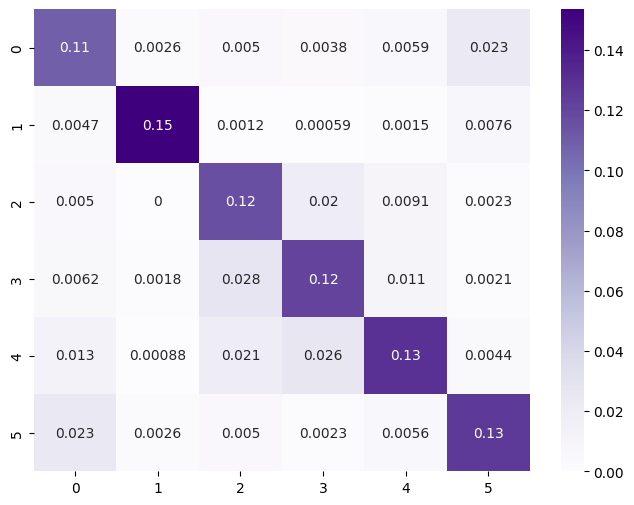

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(pred, y_test)
normalized_cm=cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Purples',annot_kws={"size": 10});

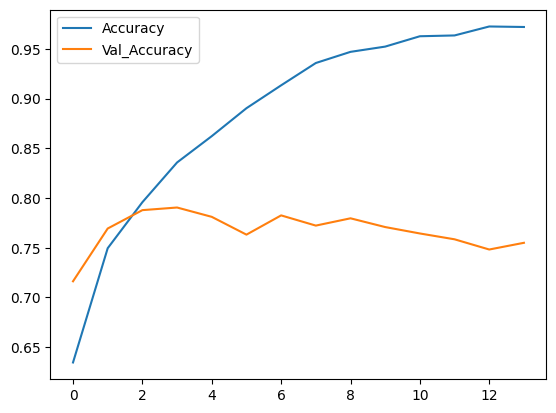

In [ ]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

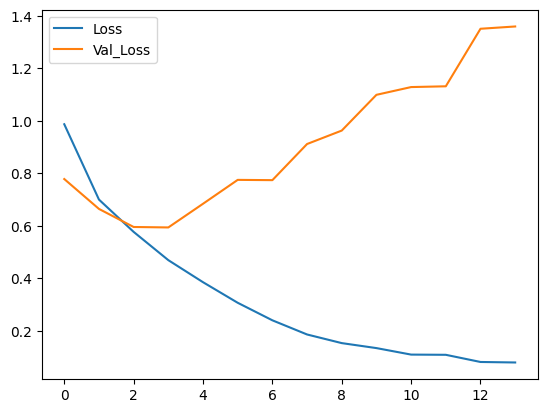

In [ ]:
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Val_Loss')
plt.legend();

In [ ]:
model.save('scene.h5')

## Transfer Learning 

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [ ]:
df.head()

,img,label,encode_label
0,/kaggle/input/scene-classification/train-scene...,0,Buildings
1,/kaggle/input/scene-classification/train-scene...,4,Street
2,/kaggle/input/scene-classification/train-scene...,5,Sea
3,/kaggle/input/scene-classification/train-scene...,0,Buildings
4,/kaggle/input/scene-classification/train-scene...,4,Street


In [ ]:
df['label'] = df['label'].astype(str)

In [ ]:
d={"0":"Buildings","1":"Forests", "2":"Mountains","3":"Glacier", "4":"Street","5":"Sea" }

#Burada ben label'ların isimlerinin olmasını istedim.Bu yüzden label encoding yaptım.

In [ ]:
df['encode_label']=df['label'].map(d)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17034 entries, 0 to 17033
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   img           17034 non-null  object
 1   label         17034 non-null  object
 2   encode_label  17034 non-null  object
dtypes: object(3)
memory usage: 399.4+ KB


In [ ]:
# Sınıf dizinlerini oluştur
for label in df['label'].unique():
    os.makedirs(os.path.join('/kaggle/input/scene-classification/train-scene classification/train', label), exist_ok=True)

# Resimleri sınıflarına göre ayır
for index, row in df.iterrows():
    img_path = row['img']  # Resim dosyasının yolu
    label = row['label']           # Resim etiketini al
    shutil.copy(img_path, os.path.join('/kaggle/input/scene-classification/train-scene classification/train', label))
    
#Dosyamızda transfer learning'in istediği gibi class isimleri tanımlanmamıştı.
#Biz bunları class'larına göre ayıracağız.

In [ ]:
data_dir='/kaggle/input/scene-classification/train-scene classification/train'

img_width,img_height=64,64

train_datagen=ImageDataGenerator(rescale=1/255,validation_split=.20)
train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode='categorical', subset='training')

test_datagen=ImageDataGenerator(rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode='categorical', subset='validation')

base_model=VGG16(weights='imagenet', input_shape=(img_width,img_height,3),include_top=False)

model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(6,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=15,validation_data=test_datagenerator)

Found 13630 images belonging to 6 classes.
Found 3404 images belonging to 6 classes.
Epoch 1/15
426/426 ━━━━━━━━━━━━━━━━━━━━ 878s 2s/step - accuracy: 0.7357 - loss: 0.7087 - val_accuracy: 0.8093 - val_loss: 0.5221
Epoch 2/15
426/426 ━━━━━━━━━━━━━━━━━━━━ 904s 2s/step - accuracy: 0.8437 - loss: 0.4208 - val_accuracy: 0.8296 - val_loss: 0.4854
Epoch 3/15
426/426 ━━━━━━━━━━━━━━━━━━━━ 883s 2s/step - accuracy: 0.8644 - loss: 0.3688 - val_accuracy: 0.8231 - val_loss: 0.4844
Epoch 4/15
426/426 ━━━━━━━━━━━━━━━━━━━━ 924s 2s/step - accuracy: 0.8850 - loss: 0.3123 - val_accuracy: 0.8135 - val_loss: 0.5326
Epoch 5/15
426/426 ━━━━━━━━━━━━━━━━━━━━ 926s 2s/step - accuracy: 0.8883 - loss: 0.2960 - val_accuracy: 0.8464 - val_loss: 0.4724
Epoch 6/15
426/426 ━━━━━━━━━━━━━━━━━━━━ 920s 2s/step - accuracy: 0.9055 - loss: 0.2505 - val_accuracy: 0.8328 - val_loss: 0.5275
Epoch 7/15
426/426 ━━━━━━━━━━━━━━━━━━━━ 859s 2s/step - accuracy: 0.9202 - loss: 0.2136 - val_accuracy: 0.8328 - val_loss: 0.5518
Epoch 8/15
4

In [ ]:
test_loss, test_acc=model.evaluate(test_datagenerator, verbose=2)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

107/107 - 173s - 2s/step - accuracy: 0.8296 - loss: 0.7329
Test Accuracy: 0.8296121954917908
Test Loss: 0.732886791229248


In [ ]:
model.save('scene_vgg16.h5')

In [ ]:
#Birde transfer learning paketlerinden InceptionV3'ü deniyorum.

In [ ]:
data_dir='/kaggle/input/scene-classification/train-scene classification/train'
img_width,img_height=75,75

train_datagen=ImageDataGenerator(rescale=1/255,validation_split=.20)
train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode='categorical', subset='training')

test_datagen=ImageDataGenerator(rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode='categorical', subset='validation')

base_model=InceptionV3(weights='imagenet', input_shape=(img_width,img_height,3),include_top=False)

model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(6,activation='softmax'))

early_stopping=EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=15,validation_data=test_datagenerator,callbacks=[early_stopping])

Found 13630 images belonging to 6 classes.
Found 3404 images belonging to 6 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/15
426/426 ━━━━━━━━━━━━━━━━━━━━ 199s 445ms/step - accuracy: 0.6649 - loss: 0.9046 - val_accuracy: 0.7729 - val_loss: 0.6327
Epoch 2/15
426/426 ━━━━━━━━━━━━━━━━━━━━ 203s 449ms/step - accuracy: 0.8138 - loss: 0.4890 - val_accuracy: 0.7847 - val_loss: 0.5969
Epoch 3/15
426/426 ━━━━━━━━━━━━━━━━━━━━ 197s 437ms/step - accuracy: 0.8762 - loss: 0.3389 - val_accuracy: 0.7767 - val_loss: 0.6357
Epoch 4/15
426/426 ━━━━━━━━━━━━━━━━━━━━ 203s 439ms/step - accuracy: 0.9264 - loss: 0.2097 - val_accuracy: 0.7741 - val_loss: 0.6994
Epoch 5/15
426/426 ━━━━━━━━━━━━━━━━━━━━ 185s 433ms/step - accuracy: 0.9695 - loss: 0.1071 - val_accuracy: 0.7676 - val_loss: 0.7925
Epoch 6/15
426/426 ━━━━━━━━━━━━━━━━━━━━ 202s 433ms/step - accuracy: 0.9841 - loss: 0.0633 - val_accuracy: 0.7729 - val_loss: 0.8473
Epoch 7/15
426/426 ━━━━━━━━━━━━━━━━━━━━ 186s 437ms/step - accuracy: 0.98

In [ ]:
model.save('scene_incep.h5')

## Özet

Bu çalışma, dünya genelinden toplanmış yaklaşık 25,000 doğal sahne görüntüsünden oluşan bir veri setini kullanarak sahne sınıflandırma görevini incelemektedir. Veri seti, her biri benzersiz özellikler taşıyan altı farklı sahne kategorisinde sınıflandırılmıştır: Binalar, Ormanlar, Dağlar, Buzullar, Sokaklar ve Deniz. Görüntüler, doğal ve yapay ortamlara ait geniş bir yelpazeyi kapsayarak, görüntü işleme ve bilgisayarla görme alanında derin öğrenme tekniklerinin etkinliğini test etmek için zengin bir kaynak sunmaktadır.

Görüntü sınıflandırma, özellikle derin öğrenme tekniklerinin gelişimi ile birlikte, bilgisayarla görü alanında önemli bir odak noktası haline gelmiştir. Doğal sahne görüntüleri, otonom araçlardan, uzaktan algılama sistemlerine kadar birçok uygulamada kritik bir rol oynamaktadır. Bu tür sistemlerin başarısı, sahnelerin doğru bir şekilde sınıflandırılmasına bağlıdır. Bu çalışma, CNN (Convolutional Neural Network) mimarisinin sahne sınıflandırma görevindeki potansiyelini değerlendirmeyi amaçlamaktadır.

Veri setinin çeşitliliği, farklı ışık koşulları, hava durumu ve perspektifler gibi değişkenleri içerdiğinden, modelin genel performansını artırmak için kapsamlı bir veri ön işleme süreci gerekmektedir. Bu süreç, görüntülerin boyutlandırılması, normalizasyonu ve veri artırma tekniklerini içermektedir. Modelin eğitimi sırasında, altı sınıf arasındaki farklılıkları öğrenmek için uygun hiperparametre ayarları yapılmış ve sonrasında modelin doğruluğu çeşitli metriklerle değerlendirilmiştir.

Sonuç olarak, bu çalışma, derin öğrenme tekniklerinin doğal sahne sınıflandırma görevindeki verimliliğini ve doğruluğunu artırma potansiyelini ortaya koymayı amaçlamaktadır. Elde edilen sonuçlar, hem akademik alanda hem de endüstriyel uygulamalarda kullanılabilecek önemli bulgular sağlayacak ve doğal sahne sınıflandırma alanında yeni yöntemlerin geliştirilmesine katkıda bulunacaktır.